In [9]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [4]:
import numpy as np
import pandas as pd

In [205]:
pd.__version__

'1.3.5'

In [5]:
train_corpus = pd.read_csv('project2/project2_training_data.txt', delimiter='\n', header=None,names=['sentences'])

In [6]:
train_corpus

,sentences
0,Merrill Lynch analyst Campbell Morgan upgraded...
1,Eriikka S+Âderstr+Âm has previously held sever...
2,The webcast may be followed online on the comp...
3,"Typical end-uses include roof structures , flo..."
4,The sale will be finalized in September or Oct...
...,...
1806,With this appointment Kaupthing Bank aims to f...
1807,Jon Risfelt has previously held operational ex...
1808,The group intends to relocate warehouse and of...
1809,"The contract includes software licences , appl..."


In [7]:
train_labels = pd.read_csv('project2/project2_training_data_labels.txt', delimiter='\n', header=None, names=['labels'])

In [8]:
train_labels

,labels
0,positive
1,neutral
2,neutral
3,neutral
4,neutral
...,...
1806,positive
1807,neutral
1808,neutral
1809,neutral


In [10]:
train_labels['labels'].value_counts()

neutral     1113
positive     456
negative     242
Name: labels, dtype: int64

In [11]:
df = pd.concat([train_corpus, train_labels], axis=1)

In [12]:
pd.set_option('max_colwidth', 600)    
df[df['labels']=='negative']

,sentences,labels
19,"However , the growth margin slowed down due to the financial crisis .",negative
23,"ADPnews - Feb 5 , 2010 - Finnish real estate investor Sponda Oyj HEL : SDA1V said today that it slipped to a net loss of EUR 81.5 million USD 11.8 m in 2009 from a profit of EUR 29.3 million in 2008 .",negative
26,"Alma Media 's operating profit amounted to EUR 11.9 mn , down from EUR 15.0 mn a year earlier .",negative
29,"Operating result showed a loss of EUR 2.9 mn , while a year before , it showed a profit of EUR 0.6 mn .",negative
44,The fair value of the company 's investment properties went down to EUR 2.768 billion at the end of 2009 from EUR 2.916 billion a year earlier .,negative
...,...,...
1756,Consolidated operating profit from continuing operations decreased by 62.3 % to EUR 51.2 mn from EUR 135.7 mn in 2007 .,negative
1764,"Salcomp Oyj , the Finnish maker of mobile phone chargers , Monday posted a EUR1 .49 million loss in the second quarter compared with a 1.70 million profit in the same period the previous year .",negative
1767,Net sales dropped by 6 % year-on-year to EUR 11.9 million .,negative
1773,Finnish business software group AffectoGenimap Oyj said its net profit halved to 1.2 mln euro ( $ 1.5 mln ) in the first nine months of 2006 from 2.2 mln euro ( $ 2.8 mln ) in the same period of 2005 .,negative


In [78]:
dups = df[df.duplicated()]
dups

,sentences,labels,cleaned
744,"SSH Communications Security Corporation is headquartered in Helsinki , Finland .",neutral,ssh communications security corporation headquartered helsinki finland
1112,Ahlstrom 's share is quoted on the NASDAQ OMX Helsinki .,neutral,ahlstrom s share quoted nasdaq omx helsinki
1712,"The report profiles 614 companies including many key and niche players worldwide such as Black & Decker Corporation , Fiskars Corporation , Fiskars Brands , Inc. , Husqvarna Outdoor Products Inc. , K+S Group , Ryobi Technologies , Inc. , The Scotts Miracle-Gro Company , and Van Group , Inc. .",neutral,report profiles 614 companies including many key niche players worldwide black decker corporation fiskars corporation fiskars brands inc husqvarna outdoor products inc k+s group ryobi technologies inc scotts miracle-gro company van group inc


In [79]:
df.drop_duplicates(inplace=True)

In [80]:
dups = df[df.duplicated()]
dups

,sentences,labels,cleaned


### Pre-processing

In [82]:
from nltk.tokenize import word_tokenize, sent_tokenize, wordpunct_tokenize, TreebankWordTokenizer, TweetTokenizer, MWETokenizer
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer
import string

In [83]:
import nltk
from nltk.corpus import stopwords

stops = set(stopwords.words('english'))
print(stops)

{'are', 'between', 'how', 'off', 'than', 'is', 'why', 'her', 'shouldn', 'am', 'weren', 'over', 'out', 'so', 'now', 'or', 'same', 'been', 'having', 'ours', 'the', 'under', 'being', "didn't", 'needn', 'as', 'then', 'aren', 'while', 't', 'ma', 'haven', 'in', 'should', 'such', 'above', 'each', 'm', 'didn', 'won', "don't", 'had', 'were', 'its', 'down', 'other', 'd', 'has', 'itself', 'both', 'wouldn', 'ain', 'with', 'ourselves', 'again', "hasn't", 'hadn', 'whom', 'further', 'to', 's', "should've", "weren't", 'own', 'we', 'after', 'wasn', 'before', "mustn't", 'will', 'did', 'themselves', "shouldn't", 'just', "shan't", 'isn', 'any', 'you', 'have', 'against', 'most', "needn't", "she's", 'if', 'for', 'yourself', "wasn't", 'don', 'until', "you'll", 'myself', 'that', 'there', 're', 'few', 'our', 'once', 'these', 'does', 'do', 'from', 'doesn', 'some', 'a', 'he', 'they', 'only', 'she', 'it', "wouldn't", "you'd", 'this', 'through', 'an', "that'll", 'mustn', 'up', 'yourselves', 'because', 'herself', '

In [84]:
stopwords = list(set(stopwords.words("english")) - {"aren't", 'above', 'couldn', "couldn't", 'didn', "didn't",'doesn',"doesn't", 'don',"don't", 'below', 'before', 'down','hadn',
                                               "hadn't",'hasn',"hasn't", 'haven',"haven't","isn't", 'isn', 'mightn',"mightn't", 'mustn', "mustn't", 'needn', "needn't", 'more', 
                                               'further','from','no','nor','not', 'over', 'shan',"shan't", 'shouldn',"shouldn't", 'to','under', 'up','wasn',"wasn't",'weren',"weren't",
                                               'won',"won't",'wouldn', "wouldn't",})

In [85]:
sorted(stopwords)

['a',
 'about',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 'as',
 'at',
 'be',
 'because',
 'been',
 'being',
 'between',
 'both',
 'but',
 'by',
 'can',
 'd',
 'did',
 'do',
 'does',
 'doing',
 'during',
 'each',
 'few',
 'for',
 'had',
 'has',
 'have',
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'most',
 'my',
 'myself',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'own',
 're',
 's',
 'same',
 'she',
 "she's",
 'should',
 "should've",
 'so',
 'some',
 'such',
 't',
 'than',
 'that',
 "that'll",
 'the',
 'their',
 'theirs',
 'them',
 'themselves',
 'then',
 'there',
 'these',
 'they',
 'this',
 'those',
 'through',
 'too',
 'until',
 've',
 'very',
 'was',
 'we',
 'were',
 'what',
 'when',
 'where',
 'which',
 'wh

In [133]:
def clean_data(text, stopwords):
    tokens = word_tokenize(text.strip())
        
    lower = [i.lower() for i in tokens]
    
    clean = [j for j in lower if j not in stopwords]
    
    punctuations = list(string.punctuation) + ['+', '-', '*', '/']
    clean = [k.strip(''.join(punctuations)) for k in clean if k not in punctuations]
    if 's' in clean:
        clean.remove('s')
    return ' '.join(clean)

In [134]:
df['cleaned'] = df['sentences'].apply(lambda x: clean_data(x, stopwords))

In [135]:
df.head(10)

,sentences,labels,cleaned
0,Merrill Lynch analyst Campbell Morgan upgraded his recommendation on PaperlinX from `` neutral '' to `` buy '' in May .,positive,merrill lynch analyst campbell morgan upgraded recommendation paperlinx from neutral to buy may
1,Eriikka S+Âderstr+Âm has previously held several positions in finance and control at Nokia Networks including acting as the Business Group Controller and having the corporate controller position at Nokia Siemens Networks .,neutral,eriikka s+âderstr+âm previously held several positions finance control nokia networks including acting business group controller corporate controller position nokia siemens networks
2,The webcast may be followed online on the company website at www.ruukki.com/investors .,neutral,webcast may followed online company website www.ruukki.com/investors
3,"Typical end-uses include roof structures , floorings , walls and ceilings , non-visible structures in vehicles , packaging and boxes , construction site structures , fencing and shelters , and formwork with a limited number of concrete pourings .",neutral,typical end-uses include roof structures floorings walls ceilings non-visible structures vehicles packaging boxes construction site structures fencing shelters formwork limited number concrete pourings
4,"The sale will be finalized in September or October , the company said .",neutral,sale finalized september october company said
5,"Finnish steel maker Rautaruukki Oyj ( Ruukki ) said on July 7 , 2008 that it won a 9.0 mln euro ( $ 14.1 mln ) contract to supply and install steel superstructures for Partihallsforbindelsen bridge project in Gothenburg , western Sweden .",positive,finnish steel maker rautaruukki oyj ruukki said july 7 2008 won 9.0 mln euro 14.1 mln contract to supply install steel superstructures partihallsforbindelsen bridge project gothenburg western sweden
6,"The works will include the laying of natural stone pavements and the installation of underground heating , and surface water drainage systems .",neutral,works include laying natural stone pavements installation underground heating surface water drainage systems
7,The order was valued at over EUR15m .,neutral,order valued over eur15m
8,"Finnish metal products company Componenta Oyj ( HEL : CTH1V ) said today its net loss narrowed to EUR 500,000 ( USD 680,000 ) in the last quarter of 2010 from EUR 5.3 million for the same period a year earlier .",positive,"finnish metal products company componenta oyj hel cth1v said today net loss narrowed to eur 500,000 usd 680,000 last quarter 2010 from eur 5.3 million period year earlier"
9,Coffee will be served starting at 14:30 EET as well as after the event .,neutral,coffee served starting 14:30 eet well event


### Explore the text

In [136]:
# Corpus
def create_corpus(df):
    corpus = []
    
    for x in df['cleaned'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [137]:
# Returns Top X frequent non stop words
def get_frequent_words(corpus, top_n=10):
    dic = dict()
    for word in corpus:
        if word in dic:
            dic[word] += 1
        else:
            dic[word] = 1

    top = sorted(dic.items(), key=lambda x: x[1], reverse=True)[:top_n]

    return zip(*top)

In [138]:
corpus = create_corpus(df)

In [139]:
len(corpus)

25013

In [140]:
len(set(corpus))

6038

In [141]:
x, y = get_frequent_words(corpus)

print(x)
print(y)

('to', 'eur', 'from', 'mn', 'company', 'profit', 'net', 'million', 'sales', 'finnish')
(851, 582, 401, 328, 276, 250, 218, 207, 192, 182)


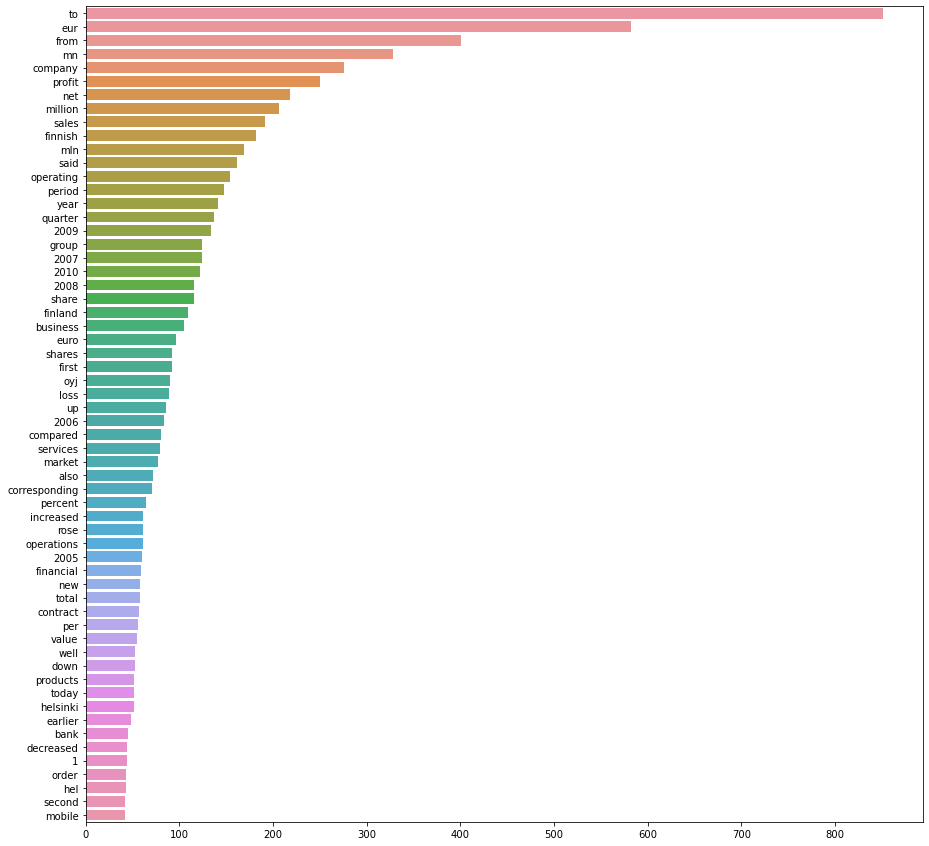

In [144]:
from collections import Counter
# Check most frequent words which are not in stopwords
counter = Counter(corpus)
most = counter.most_common()[:60]
x, y = [], []
for word, count in most:
    x.append(word)
    y.append(count)

plt.figure(figsize=(15,15))
sns.barplot(x=y, y=x);

## WordCloud

In [25]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [145]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

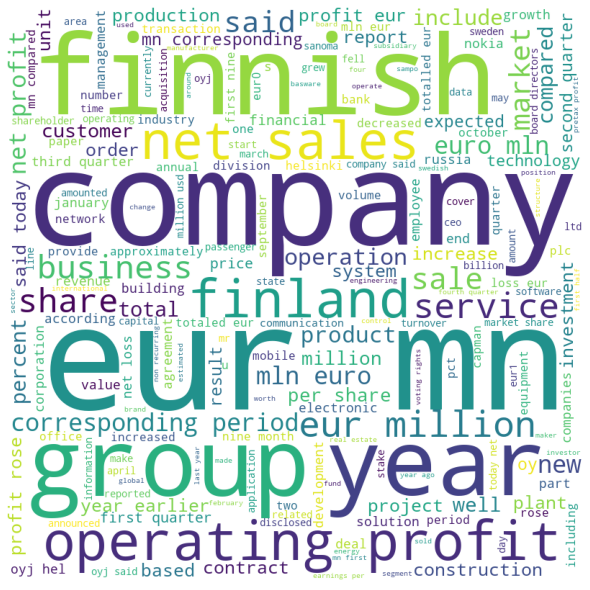

In [146]:
comment_words = ''

# iterate through the csv file
for val in df.cleaned:
     
    # split the value
    tokens = val.split()
     
    comment_words += " ".join(tokens)+" "
    
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(comment_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

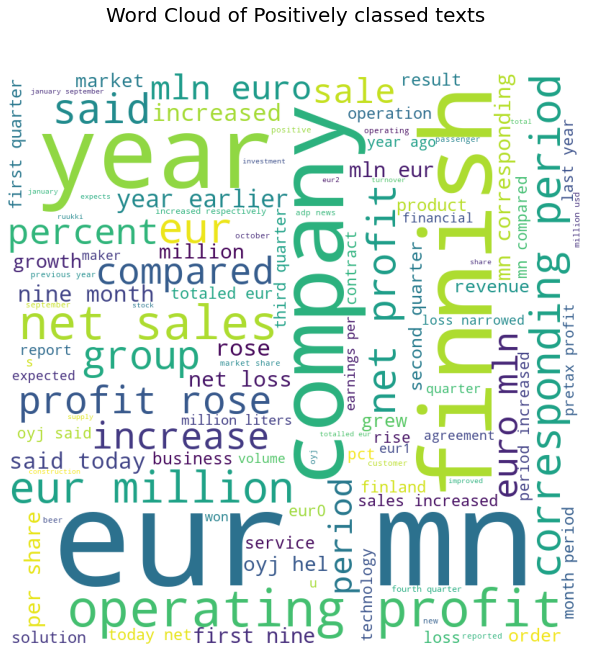

In [147]:
pos_words = ''

# iterate through the csv file
for val in df[df.labels == 'positive'].cleaned:
     
    # split the value
    tokens = val.split()
     
    pos_words += " ".join(tokens)+" "

wordcloud_pos = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(pos_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_pos)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud of Positively classed texts\n\n', fontsize = 20)
 
plt.show()

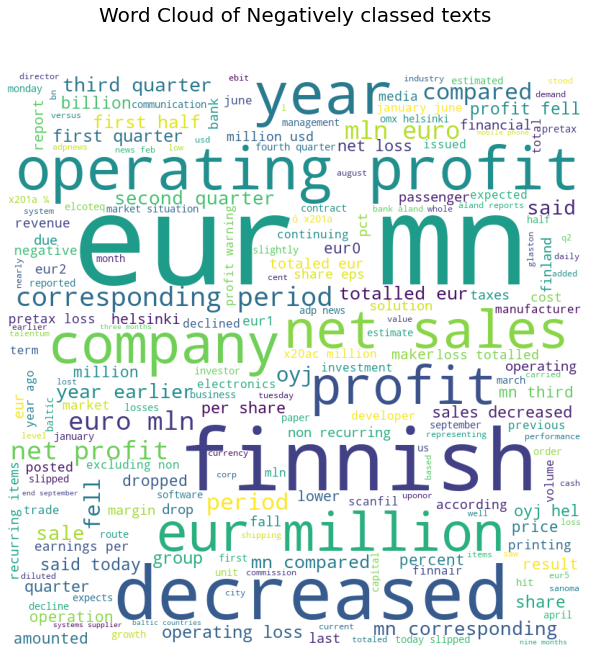

In [148]:
## For negative class

neg_words = ''

# iterate through the csv file
for val in df[df.labels == 'negative'].cleaned:
     
    # split the value
    tokens = val.split()
     
    neg_words += " ".join(tokens)+" "

wordcloud_neg = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(neg_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_neg)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud of Negatively classed texts\n\n', fontsize = 20)
 
plt.show()

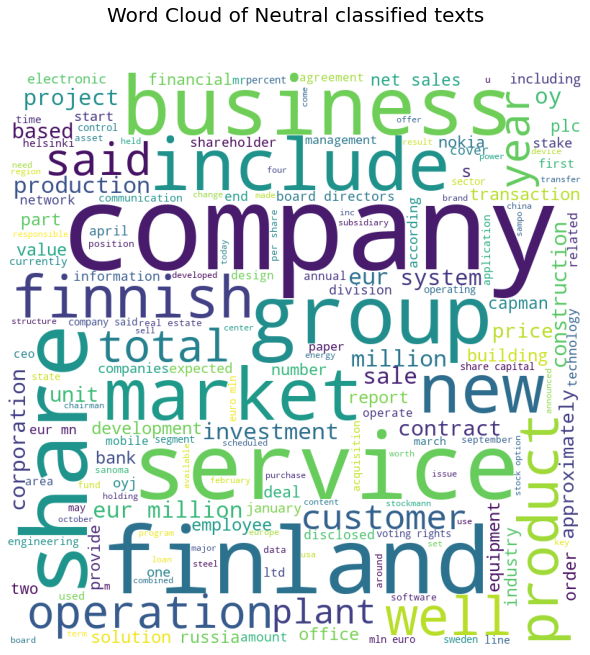

In [149]:
## For neutral class

neutral_words = ''

# iterate through the csv file
for val in df[df.labels == 'neutral'].cleaned:
     
    # split the value
    tokens = val.split()
     
    neutral_words += " ".join(tokens)+" "

wordcloud_neutral = WordCloud(width = 800, height = 800,
                background_color ='white',
                min_font_size = 10).generate(neutral_words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud_neutral)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.title('Word Cloud of Neutral classified texts\n\n', fontsize = 20)

plt.show()

In [98]:
pip install seaborn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 285.1/285.1 kB 2.2 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [150]:
import seaborn as sns

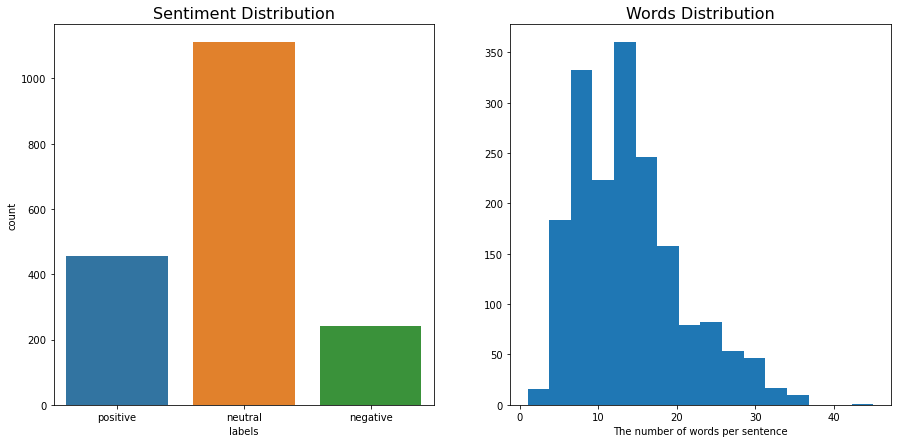

In [151]:
num_words_per_sentence = df['cleaned'].apply(lambda x: len(nltk.word_tokenize(x)))

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))


sns.countplot(x='labels', data=df, ax=ax1)
ax1.set_title('Sentiment Distribution', fontsize=16)
ax2.hist(num_words_per_sentence,bins = 16)
ax2.set_xlabel('The number of words per sentence')
ax2.set_title('Words Distribution', fontsize=16);

## Modeling

In [196]:
import csv,sys
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV 
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn import svm 
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.feature_selection import SelectKBest,chi2 

In [206]:
labels = df.labels.values
data =df['cleaned'].values

In [207]:
def build_model(opt2):

    global data, labels
    # Training and Test Split           
    trn_data, tst_data, trn_cat, tst_cat = train_test_split(data, labels, test_size=0.20, random_state=42,stratify=labels)   
#     print(trn_data)
#     print(trn_cat)

 # Naive Bayes Classifier    
    if opt2=='mn':      
        clf=MultinomialNB(alpha=0,fit_prior=True, class_prior=None)  
        clf_parameters = {
        'clf__alpha':(0,1),
        }  
# SVM Classifier
    elif opt2=='ls': 
        clf = svm.LinearSVC(class_weight='balanced')  
        clf_parameters = {
        'clf__C':(0.1,1,2,10,50,100),
        }   
    elif opt2=='s':
        clf = svm.SVC(kernel='linear', class_weight='balanced')  
        clf_parameters = {
        'clf__C':(0.1,0.5,1,2,10,50,100)
        }   
# Logistic Regression Classifier    
    elif opt2=='lr':    
        clf=LogisticRegression(penalty='l2', class_weight='balanced') 
        clf_parameters = {
        'clf__solver':('newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga')
        }    
# Decision Tree Classifier
    elif opt2=='dt':
        clf = DecisionTreeClassifier(class_weight='balanced', random_state=40)
        clf_parameters = {
        'clf__criterion':('gini', 'entropy'), 
        'clf__max_depth': (10, 20, 30, 50),
        'clf__max_features':('auto', 'sqrt', 'log2'),
        'clf__ccp_alpha':(0.01,0.02,0.03,0.05,0.08,0.1)
        }  
# Random Forest Classifier    
    elif opt2=='rf':
        clf = RandomForestClassifier(class_weight='balanced')
        clf_parameters = {
        'clf__criterion':('gini', 'entropy'), 
        'clf__max_features':('auto', 'sqrt', 'log2'),   
        'clf__n_estimators':(30,50,100,200),
        'clf__max_depth':(10, 20, 30, 50),
        }     
    
    elif opt2 == 'xgb':
        clf = XGBClassifier()
        clf_parameters = {
        'clf__learning_rate': [0.05, 0.1, 0.2],
        'clf__max_depth': [7, 10, 15],
        'clf__min_child_weight':[0.5, 1, 3, 5],
        'clf__subsample': [0.8, 0.7],
        'clf__n_estimators' : [10, 50, 200]
        }

    else:
        print('!!!!!!!!! Wrong Input !!!!!!!!! \n')
        sys.exit(0)                                  

    # Feature Extraction
    pipeline = Pipeline([
    ('vect', CountVectorizer(token_pattern=r'\b\w+\b')),
    ('feature_selector', SelectKBest(chi2, k=1000)),         
    ('tfidf', TfidfTransformer(use_idf=True,smooth_idf=True)),
    ('clf', clf)
    ]) 
        
    feature_parameters = {
    'vect__min_df': (2,3),
    'vect__ngram_range': ((1,1),(1, 2),(1,3),(2,3))  # Unigrams, Bigrams or Trigrams
    }
    
# Classificaion
    parameters={**feature_parameters,**clf_parameters} 
    grid = GridSearchCV(pipeline,parameters,scoring='f1_macro',cv=10)          
    grid.fit(trn_data,trn_cat)     
    clf= grid.best_estimator_  
    print('********* Best Set of Parameters ********* \n\n')
#     print(clf)
    
    predicted = clf.predict(tst_data)
    predicted = list(predicted)

    # Evaluation
    print('\n Total documents in the training set: '+str(len(trn_data))+'\n')    
    print('\n Total documents in the test set: '+str(len(tst_data))+'\n')
    print ('\n Confusion Matrix \n')  
    print (confusion_matrix(tst_cat, predicted))  
    
    print('Classification Report\n',classification_report(tst_cat, predicted))

    pr=precision_score(tst_cat, predicted, average='macro') 
    print ('\n Precision:'+str(pr)) 
    
    rl=recall_score(tst_cat, predicted, average='macro') 
    print ('\n Recall:'+str(rl))

    fm=f1_score(tst_cat, predicted, average='macro') 
    print ('\n Macro Averaged F1-Score:'+str(fm))
    
    return clf

In [175]:
build_model('ls')

********* Best Set of Parameters ********* 


Pipeline(steps=[('vect', CountVectorizer(min_df=2, token_pattern='\\b\\w+\\b')),
                ('feature_selector',
                 SelectKBest(k=1000,
                             score_func=<function chi2 at 0x179434af0>)),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(C=1, class_weight='balanced'))])

 Total documents in the training set: 1446


 Total documents in the test set: 362


 Confusion Matrix 

[[ 41   4   4]
 [  7 202  13]
 [  5  20  66]]
              precision    recall  f1-score   support

    negative       0.77      0.84      0.80        49
     neutral       0.89      0.91      0.90       222
    positive       0.80      0.73      0.76        91

    accuracy                           0.85       362
   macro avg       0.82      0.82      0.82       362
weighted avg       0.85      0.85      0.85       362


 Precision:0.820856979428819

 Recall:0.8239731096873953

 Macro Averaged F1-

Pipeline(steps=[('vect', CountVectorizer(min_df=2, token_pattern='\\b\\w+\\b')),
                ('feature_selector',
                 SelectKBest(k=1000,
                             score_func=<function chi2 at 0x179434af0>)),
                ('tfidf', TfidfTransformer()),
                ('clf', LinearSVC(C=1, class_weight='balanced'))])

In [182]:
build_model('lr')

********* Best Set of Parameters ********* 



 Total documents in the training set: 1446


 Total documents in the test set: 362


 Confusion Matrix 

[[ 39   6   4]
 [  6 201  15]
 [  9  17  65]]
Classification Report
               precision    recall  f1-score   support

    negative       0.72      0.80      0.76        49
     neutral       0.90      0.91      0.90       222
    positive       0.77      0.71      0.74        91

    accuracy                           0.84       362
   macro avg       0.80      0.81      0.80       362
weighted avg       0.84      0.84      0.84       362


 Precision:0.7977843915343915

 Recall:0.8052031623460195

 Macro Averaged F1-Score:0.8004946625783406


Pipeline(steps=[('vect', CountVectorizer(min_df=2, token_pattern='\\b\\w+\\b')),
                ('feature_selector',
                 SelectKBest(k=1000,
                             score_func=<function chi2 at 0x179434af0>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 LogisticRegression(class_weight='balanced',
                                    solver='newton-cg'))])

In [193]:
build_model('s')

********* Best Set of Parameters ********* 



 Total documents in the training set: 1446


 Total documents in the test set: 362


 Confusion Matrix 

[[ 40   6   3]
 [  8 194  20]
 [  8  16  67]]
Classification Report
               precision    recall  f1-score   support

    negative       0.71      0.82      0.76        49
     neutral       0.90      0.87      0.89       222
    positive       0.74      0.74      0.74        91

    accuracy                           0.83       362
   macro avg       0.79      0.81      0.80       362
weighted avg       0.83      0.83      0.83       362


 Precision:0.785626102292769

 Recall:0.8088213802499516

 Macro Averaged F1-Score:0.7960270008253055


Pipeline(steps=[('vect', CountVectorizer(min_df=2, token_pattern='\\b\\w+\\b')),
                ('feature_selector',
                 SelectKBest(k=1000,
                             score_func=<function chi2 at 0x179434af0>)),
                ('tfidf', TfidfTransformer()),
                ('clf', SVC(C=2, class_weight='balanced', kernel='linear'))])

In [194]:
build_model('rf')

********* Best Set of Parameters ********* 



 Total documents in the training set: 1446


 Total documents in the test set: 362


 Confusion Matrix 

[[ 23  11  15]
 [  0 220   2]
 [  1  28  62]]
Classification Report
               precision    recall  f1-score   support

    negative       0.96      0.47      0.63        49
     neutral       0.85      0.99      0.91       222
    positive       0.78      0.68      0.73        91

    accuracy                           0.84       362
   macro avg       0.86      0.71      0.76       362
weighted avg       0.85      0.84      0.83       362


 Precision:0.8641881031121538

 Recall:0.713899142470571

 Macro Averaged F1-Score:0.7581032219227223


Pipeline(steps=[('vect',
                 CountVectorizer(min_df=2, ngram_range=(1, 3),
                                 token_pattern='\\b\\w+\\b')),
                ('feature_selector',
                 SelectKBest(k=1000,
                             score_func=<function chi2 at 0x179434af0>)),
                ('tfidf', TfidfTransformer()),
                ('clf',
                 RandomForestClassifier(class_weight='balanced', max_depth=50,
                                        max_features='auto'))])

In [195]:
build_model('mn')

********* Best Set of Parameters ********* 



 Total documents in the training set: 1446


 Total documents in the test set: 362


 Confusion Matrix 

[[ 35   2  12]
 [  8 196  18]
 [  9  17  65]]
Classification Report
               precision    recall  f1-score   support

    negative       0.67      0.71      0.69        49
     neutral       0.91      0.88      0.90       222
    positive       0.68      0.71      0.70        91

    accuracy                           0.82       362
   macro avg       0.76      0.77      0.76       362
weighted avg       0.82      0.82      0.82       362


 Precision:0.756305118789819

 Recall:0.7704847704847705

 Macro Averaged F1-Score:0.7630064032460676


Pipeline(steps=[('vect',
                 CountVectorizer(min_df=3, ngram_range=(1, 3),
                                 token_pattern='\\b\\w+\\b')),
                ('feature_selector',
                 SelectKBest(k=1000,
                             score_func=<function chi2 at 0x179434af0>)),
                ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB(alpha=0))])

In [208]:
build_model('xgb')

KeyboardInterrupt: 

## Logistic Regression

 Precision:0.859504132231405

 Recall:0.859504132231405

 Micro Averaged F1-Score:0.859504132231405


## Linear SVC
Precision:0.8732782369146006

 Recall:0.8732782369146006

 Micro Averaged F1-Score:0.8732782369146006

## SVM
Precision:0.8539944903581267

Recall:0.8539944903581267

Micro Averaged F1-Score:0.8539944903581267

## Decision Tree
 Precision:0.721763085399449

 Recall:0.721763085399449

 Micro Averaged F1-Score:0.721763085399449

## Random Forest
 Precision:0.8264462809917356

 Recall:0.8264462809917356

 Micro Averaged F1-Score:0.8264462809917356

## MNB
Precision:0.8209366391184573

 Recall:0.8209366391184573

 Micro Averaged F1-Score:0.8209366391184573
